Path found: ['A', 'F', 'G', 'I', 'J']
Total cost: 10


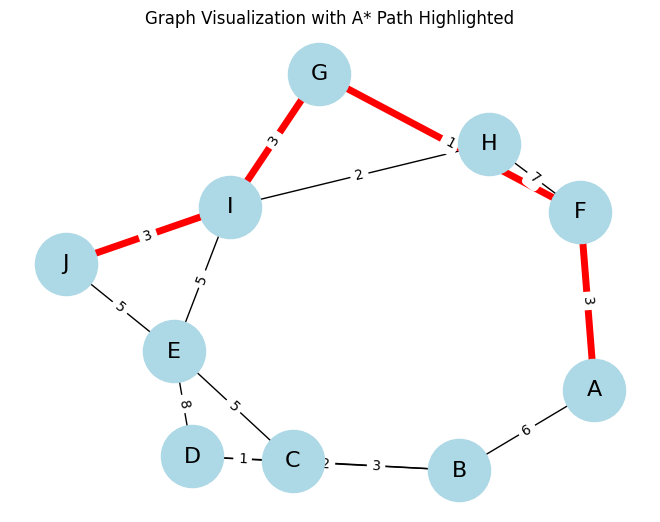

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1), ('H', 7)],
    'G': [('I', 3), ('F', 1)],
    'H': [('I', 2), ('F', 7)],
    'I': [('E', 5), ('J', 3)]
}

def get_neighbors(v):
    return Graph_nodes.get(v, None)

def h(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0             
    }
    return H_dist[n]

def aStarAlgo(start_node, stop_node):
    open_set = {start_node}
    closed_set = set()
    g = {} 
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node
    
    while len(open_set) > 0:
            n = None
            for v in open_set:
                if n == None or g[v] + h(v) < g[n] + h(n):
                    n = v
                    
            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                         
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)

            if n == None:
                print('Path does not exist!')
                return None
            if n == stop_node:
                path = []
                total_cost = g[n]
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
 
                path.append(start_node)
 
                path.reverse()
                return path, total_cost
            open_set.remove(n)
            closed_set.add(n)
 
    print('Path does not exist!')
    return None
   
# Run A* algorithm
path, cost = aStarAlgo('A', 'J')
print('Path found:', path)
print('Total cost:', cost)

# Visualization
def draw_graph(path):
    G = nx.Graph()
    
    for node, edges in Graph_nodes.items():
        for neighbor, weight in edges:                                 # node will hold the current node's name, and edges will hold the 
            G.add_edge(node, neighbor, weight=weight)                  # list of tuples representing the neighbors and their weights.
            

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=5)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization with A* Path Highlighted")
    plt.show()

draw_graph(path)